<a href="https://colab.research.google.com/github/PUTIN-POMOGI/Create_db_faker/blob/master/Kirilin_Anton_XYXZX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import numpy as np
import sympy as sp


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Forward kinematics


In [140]:
def sym_rot_z(theta):
    rot = sp.zeros(4, 4)
    rot[3,3] = 1
    rot[2,2] = 1
    rot[0,:] = [[ sp.cos(theta), -sp.sin(theta), 0, 0]]
    rot[1,:] = [[ sp.sin(theta), sp.cos(theta), 0, 0]]
    return rot

def sym_rot_x(theta): 
    rot = sp.zeros(4, 4)
    rot[3,3] = 1
    rot[0,0] = 1
    rot[1,:] = [[0, sp.cos(theta), -sp.sin(theta), 0]]
    rot[2,:] = [[0, sp.sin(theta), sp.cos(theta), 0]]

    return rot

def sym_rot_y(theta): 
    rot = sp.zeros(4, 4)
    rot[3,3] = 1
    rot[1,1] = 1
    rot[0,:] = [[sp.cos(theta), 0, sp.sin(theta),0]]
    rot[2,:] = [[-sp.sin(theta), 0, sp.cos(theta),0]]

    return rot


def sym_trans(vector):
  mat = sp.eye(4)
  mat[0:3,3] = vector
  return mat

In [141]:
d =sp.symbols(r"d_:6")
q = sp.symbols(r"q_:6")

T01 = sym_trans([d[1]+q[1], 0, 0]) # from the first link to the second
T12 = sym_trans([0, d[2]+q[2], 0]) # from the second to the third
T23 = sym_trans([0, 0, d[3]]) @ sym_rot_x(q[3]) # from the third to the forth 
T34 = sym_trans([d[4], 0, 0]) @ sym_rot_z(q[4]) # from forth to the fifth
T45 = sym_trans([d[5], 0, 0]) @ sym_rot_x(q[5]) # from fifth to the sixth

T0E = T01 @ T12 @ T23 @ T34 @ T45 # from the base (first links frame) to the end effector (sixth link frame)
T0E

Matrix([
[         cos(q_4),                              -sin(q_4)*cos(q_5),                               sin(q_4)*sin(q_5),    d_1 + d_4 + d_5*cos(q_4) + q_1],
[sin(q_4)*cos(q_3), -sin(q_3)*sin(q_5) + cos(q_3)*cos(q_4)*cos(q_5), -sin(q_3)*cos(q_5) - sin(q_5)*cos(q_3)*cos(q_4), d_2 + d_5*sin(q_4)*cos(q_3) + q_2],
[sin(q_3)*sin(q_4),  sin(q_3)*cos(q_4)*cos(q_5) + sin(q_5)*cos(q_3), -sin(q_3)*sin(q_5)*cos(q_4) + cos(q_3)*cos(q_5),       d_3 + d_5*sin(q_3)*sin(q_4)],
[                0,                                               0,                                               0,                                 1]])

In [142]:
def extract_vectors_from_trans(trans):
    x,y,z = trans[0:3,3]
    p = [x,y,z]
    v1 = trans[0:3,0]
    v2 = trans[0:3,1]
    v3 = trans[0:3,2]

    return p, [v1,v2,v3]

def plot_arrow(ax, p, v, color, scale):
  x,y,z = p 
  u,v,w = v 
  
  ax.quiver(x, y, z, u, v, w, length=scale, normalize=True,color=color, linewidth=3)

  


def plot_frame(ax, trans, label, scale=0.5): 
  p,vs = extract_vectors_from_trans(trans)
  colors = ['r', 'g', 'b']

  for i in range(3): 
    plot_arrow(ax, p , vs[i], colors[i], scale)
  
  ax.text(*p, label, color='black')
    

In [143]:
base_transform = sym_trans([0,0,0.1])
frame_1 = base_transform @ T01
frame_2 = frame_1 @ T12
frame_3 = frame_2 @ T23
frame_4 = frame_3 @ T34
frame_5 = base_transform @ T0E

frame_1_l = sp.lambdify([d[1],q[1]], frame_1)
frame_2_l = sp.lambdify([*d[1:3], *q[1:3]], frame_2)
frame_3_l = sp.lambdify([*d[1:4], *q[1:4]], frame_3)
frame_4_l = sp.lambdify([*d[1:5], *q[1:5]], frame_4)
frame_5_l = sp.lambdify([*d[1:6], *q[1:6]], frame_5)



In [144]:
fr1 = frame_1_l(0.1, 0.3)
fr2 = frame_2_l(0.1, 0.1, 0.3, 0.3)
fr3 = frame_3_l(0.1, 0.1, 0.4, 0.3, 0.3, 0.1)
fr4 = frame_4_l(0.1, 0.1, 0.4, 0.4, 0.3, 0.3, 0.1, -0.2)
fr5 = frame_5_l(0.1, 0.1, 0.4, 0.4, 0.4, 0.3, 0.3, 0.1, -0.2, 0.3)

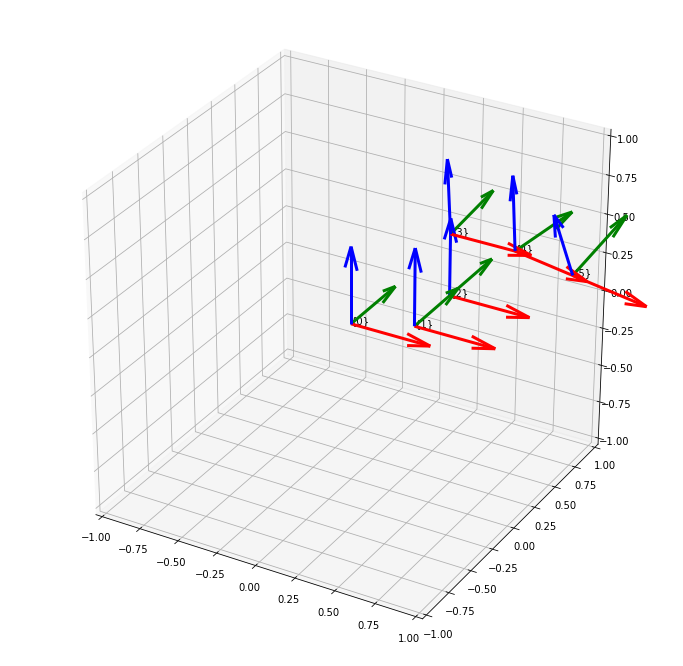

In [145]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
lim = [-1,1]
plot_frame(ax, sp.eye(4),"{0}")
plot_frame(ax, fr1,"{1}")
plot_frame(ax, fr2, "{2}")
plot_frame(ax, fr3, "{3}")
plot_frame(ax, fr4, "{4}")
plot_frame(ax, fr5, "{5}")
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_zlim(lim)
ax.can_zoom()
plt.show()

#Jacobian


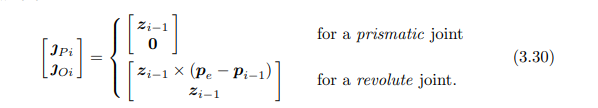